<a href="https://colab.research.google.com/github/udsey/SATO_RL/blob/main/Train_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [3]:
limits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1K1UQvze_eXlfc6V5lIjCu4Ypu8pnpuCL',
                     sep='[\t ]', engine='python', 
                     header=None)
profile = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1rKshHYYL6yNBv4cctY_z6SYA3y17d3pb',
                      sep='\t',
                      header=None)
schedule = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=14TCKuKW7BlTvx-YkJoG5_99DWuPSPgqH',
                       sep='\t',
                       header=None)
schedule.columns = ['id', 'start', 'stop', 'time_sec', 'is_stoped', 'station_name']

trafic_light = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1pvRc4cvuH9DciBtMHANBHcqaV42nnNQX',
                       sep='\t',
                       header=None)

In [4]:
schedule

,id,start,stop,time_sec,is_stoped,station_name
0,1464,1669896,1686577,19,0,0
1,1468,1686577,1707128,20,0,16681
2,1470,1707128,1727412,18,1,37232


In [5]:
# Подготовка данных по ограничению скорости
df_lim = limits.copy()
df_lim['x'] = limits.apply(lambda x: range(x[0], x[1]), axis=1)
df_lim = df_lim.explode('x')
df_lim.drop(columns=[0, 1], inplace=True)
df_lim.rename(columns={2:'y'}, inplace=True)


add_lim = np.arange(df_lim.x.values[-1], profile.iloc[-1,0])
df_add_lim = pd.DataFrame({'x':add_lim, 'y':np.repeat(80, len(add_lim ))})
df_lim = df_lim.append(df_add_lim)

In [6]:
# Для отрисовки статического изображения в git
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 1300
svg_renderer.height = 600
svg_renderer.engine = 'kaleido' #static image generation dependency, install it using pip or conda.

pio.renderers.default = "svg"  # set as default renderer (optional) 

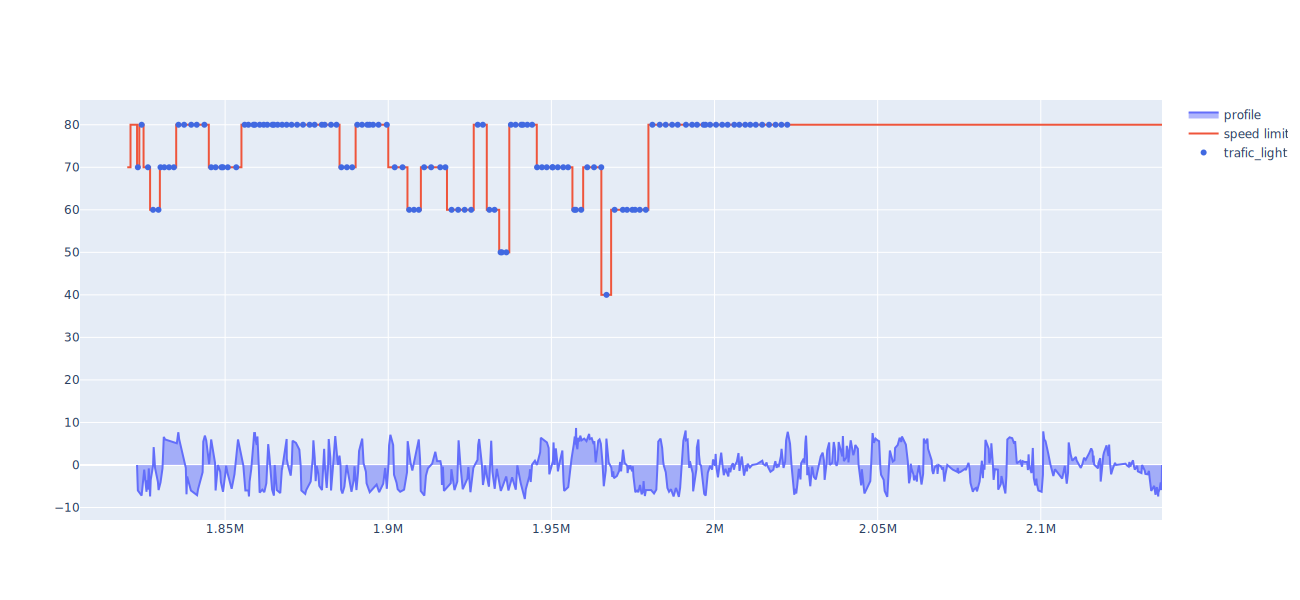

In [7]:
import plotly.graph_objects as go


layout = go.Layout(
    autosize=False,
    width=1500,
    height=500)

fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=profile[0], y=profile[1], fill='tozeroy', name='profile')) # fill down to xaxis
fig.add_trace(go.Scatter(x=df_lim.x, y=df_lim.y, name='speed limit'))
fig.add_trace(go.Scatter(x=trafic_light[0], y=df_lim[df_lim.x.isin(trafic_light[0])].y,
                         mode='markers',
                         line=dict(color='royalblue', width=1, dash='dot'),
                         name='trafic_light'))

fig.show('svg')
#fig.show()
